In [4]:
from SpinTools.spinhamiltonian import spinhamiltonian as sh

ham = sh.SpinHamiltonian('Bi')

Bz = ham.get_field_sweep(bmin=0,bmax=1,bnum=1000)
energy = ham.calculate_energy(Bz)

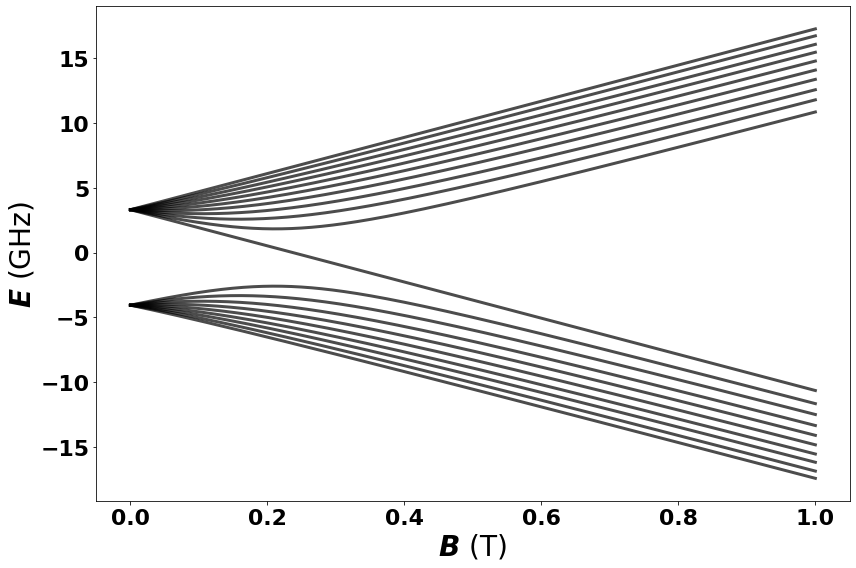

In [5]:
from matplotlib import pyplot as plt

plt.figure(figsize=(12,8))
plt.plot(Bz, energy,'k',alpha=.7)
plt.xlabel('$B$ (T)')
plt.ylabel('$E$ (GHz)')
plt.tight_layout()
plt.show()